In [25]:
import numpy as np 
import pandas as pd
from utils.utils import *
from utils import plotting as plotting

In [26]:
acc_sample = load_modality('mm-fit/w00/w00_eb_l_acc.npy')
gyr_sample = load_modality('mm-fit/w00/w00_eb_l_gyr.npy')

In [42]:
gyr_sample[0,1] 

1562790867557.0

In [46]:
gyr_sample[4,1]

1562790867582.0

In [28]:
acc_sample

array([[ 4.05000000e+03,  1.56279087e+12, -5.03740029e+00,
         6.57208356e-01,  1.61608612e-01],
       [ 4.05000000e+03,  1.56279087e+12, -5.96635054e+00,
         4.66869324e-01,  8.88248816e-01],
       [ 4.05000000e+03,  1.56279087e+12, -7.04014998e+00,
         5.26724365e-01,  1.18153852e+00],
       ...,
       [ 6.79660000e+04,  1.56279300e+12, -2.07577284e+00,
         9.87009634e+00, -2.44088859e+00],
       [ 6.79670000e+04,  1.56279300e+12, -2.35948574e+00,
         9.53849941e+00, -2.31998141e+00],
       [ 6.79670000e+04,  1.56279300e+12, -2.43370599e+00,
         9.12071122e+00, -2.58813199e+00]])

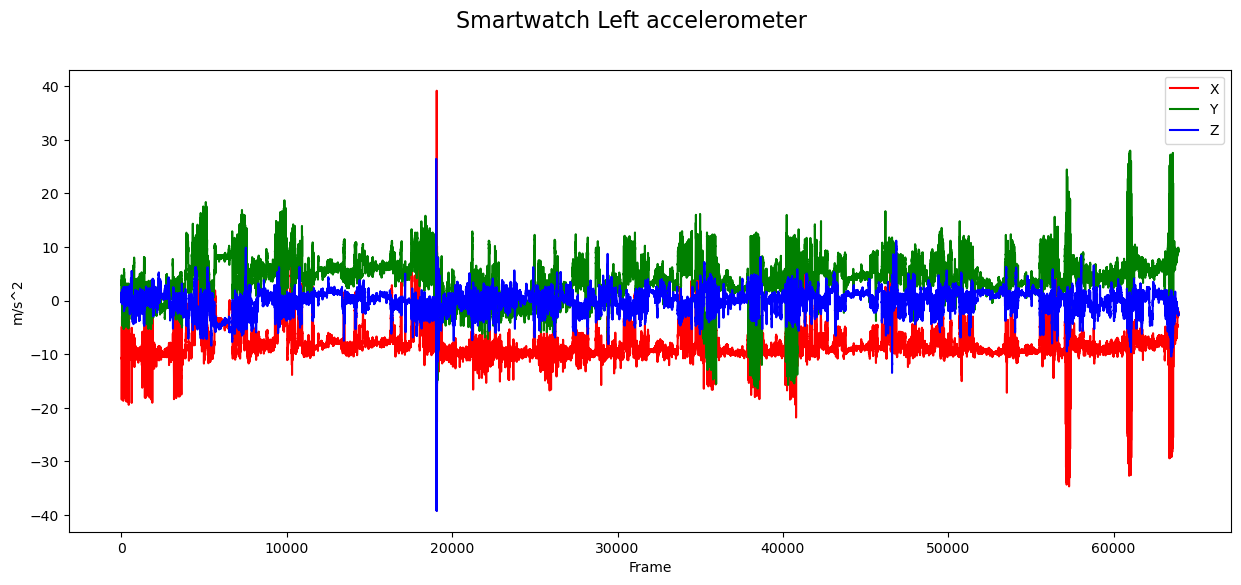

In [29]:
plotting.plot_sensor(acc_sample, data_type='acc', title="Smartwatch Left accelerometer", overlay=True)

In [30]:
label_df = pd.read_csv('mm-fit/w00/w00_labels.csv', names = ['start_frame', 'end_frame', 'repititions', 'label'])
label_df.head()

,start_frame,end_frame,repititions,label
0,4040,4500,10,squats
1,5435,5928,10,squats
2,7200,7685,10,squats
3,8770,9197,11,pushups
4,11160,11586,10,pushups


In [103]:
from tqdm import tqdm
def create_df(acc_data, gyr_data, label_df, person_id = 0):

    # create dataframes for acceleromters and gyrosccopes
    acc_df = pd.DataFrame(acc_data, columns=['frame', 'timestamp', 'acc_X', 'acc_Y', 'acc_Z']).reset_index()
    gyr_df = pd.DataFrame(gyr_data, columns=['frame', 'timestamp', 'gyr_X', 'gyr_Y', 'gyr_Z']).reset_index()

    # combine the two dataframes
    df = pd.merge(acc_df, gyr_df, how = 'inner', on = ['index', 'frame', 'timestamp'])
    df['label'] = " "
    df['user_id'] = person_id

    # start at the begnining of the labels
    label_tracker = 0
    label = label_df.loc[label_tracker, 'label']
    
    # loop througbn the dataframe
    for i, row in tqdm(df.iterrows()):
        
        # move to next label if frame is past current exercise
        if row['frame'] > label_df.loc[label_tracker, 'end_frame']:
            label_tracker += 1

            # move to next exercise
            if label_tracker < len(label_df):
                label = label_df.loc[label_tracker, 'label']

            # break from loop if no more exercises
            else:
                df.loc[i:, 'label'] = 'non-e'
                break
        
        # assign proper label
        if row['frame'] > label_df.loc[label_tracker, 'start_frame']:
            df.at[i, 'label'] = label
        else:
            df.at[i, 'label'] = "non-e"

    return df


signal_df = create_df(acc_sample, gyr_sample, label_df)
signal_df.head(20)

194515it [00:04, 45163.18it/s]


,index,frame,timestamp,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,label,user_id
0,0,4050.0,1.562791e+12,-5.037400,0.657208,0.161609,-0.052147,0.250093,0.326717,squats,0
1,1,4050.0,1.562791e+12,-5.966351,0.466869,0.888249,0.010642,0.349598,0.135689,squats,0
2,2,4050.0,1.562791e+12,-7.040150,0.526724,1.181539,-0.170808,0.211781,0.125046,squats,0
3,3,4050.0,1.562791e+12,-7.274782,1.013944,1.614889,0.067578,0.168680,0.291598,squats,0
4,4,4050.0,1.562791e+12,-7.236475,1.308431,1.533486,0.087266,-0.146863,0.334699,squats,0
5,5,4051.0,1.562791e+12,-6.955156,2.250550,0.970849,0.257542,-0.124514,0.269249,squats,0
6,6,4051.0,1.562791e+12,-7.127538,2.816778,0.622492,0.593306,-0.285212,0.422497,squats,0
7,7,4051.0,1.562791e+12,-7.131130,3.035848,0.383072,0.578938,-0.201139,0.268717,squats,0
8,8,4052.0,1.562791e+12,-8.033744,3.807978,0.390255,0.217102,0.110147,0.131964,squats,0
9,9,4052.0,1.562791e+12,-8.458714,3.829526,0.239420,0.110147,0.245836,0.072367,squats,0


In [104]:
signal_df.columns

Index(['index', 'frame', 'timestamp', 'acc_X', 'acc_Y', 'acc_Z', 'gyr_X',
       'gyr_Y', 'gyr_Z', 'label', 'user_id'],
      dtype='object')

In [81]:
import matplotlib.pyplot as plt
def plot_sensor_label(data, data_type,label, title='', filepath=None, size=(15, 6), overlay=True, seconds = 10):


    data = data[(data['label'] == label) & (data['frame'] < 100*seconds+min(data[data['label'] == label]['frame']))]

    data_t = data.loc[:, 'frame']

    if data_type == 'acc':
        text = 'Accelerometer'
        ylabel = 'm/s^2'

    elif data_type == 'gyr':
        text = 'Gyroscope'
        ylabel = 'radians/s'

    else:
        raise Exception('The data_type argument, {}, is not valid. Must be acc, gyr, mag, or hr'.format(data_type))

    fig, ax = plt.subplots(1, 1, figsize=size, sharex=True)

    ax.plot(data_t, data.loc[:, f'{data_type}_X'], 'r-', label='X')
    ax.plot(data_t, data.loc[:, f'{data_type}_Y'], 'g-', label='Y')
    ax.plot(data_t, data.loc[:, f'{data_type}_Z'], 'b-', label='Z')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Frame')

    fig.suptitle(title, size=16)
    if filepath is not None:
        fig.savefig(filepath, bbox_inches='tight')
    plt.show()

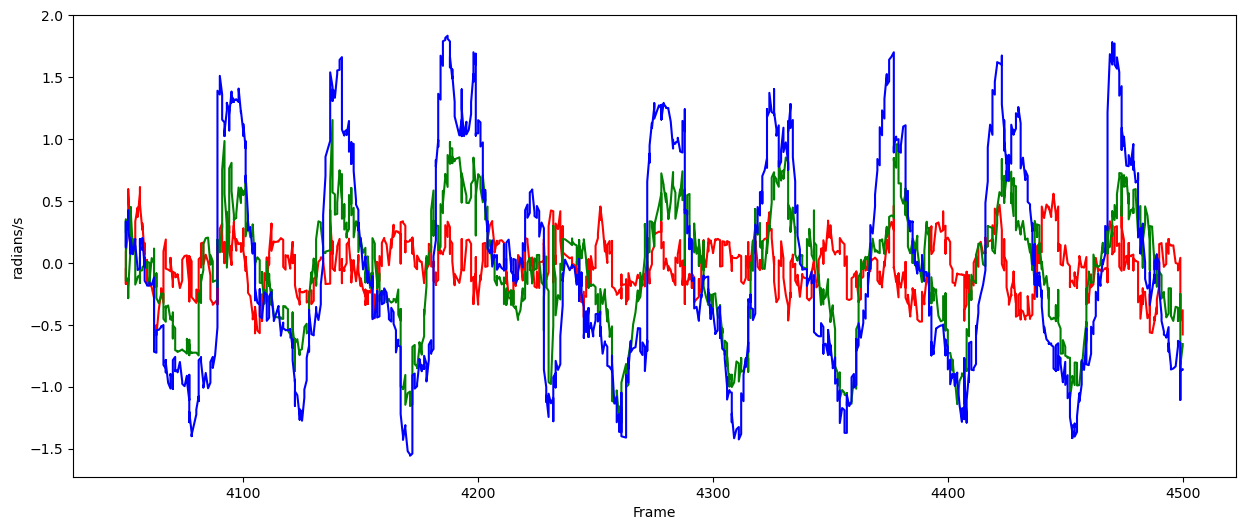

In [87]:
plot_sensor_label(signal_df, 'gyr', 'squats', seconds = 10)

In [100]:

def create_examples(df, seconds=10):
    ex_df = pd.DataFrame(columns=['id', 'sig_array', 'label'])
    label = df.loc[0, 'label']
    counter = 0
    arr = []

    for i, row in tqdm(df.iterrows(), total=len(df)):
        if row['label'] != label:
            label = row['label']
            counter = 0
            arr = []

        arr.append(row[['gyr_X', 'gyr_Y', 'gyr_Z', 'acc_X', 'acc_Y', 'acc_Z']].values)
        counter += 1  # Increment counter

        if counter >= seconds * 100:
            ex_df.loc[len(ex_df)] = [len(ex_df), np.array(arr), label]
            counter = 0
            arr = []

    return ex_df


ex_df = create_examples(signal_df, 3)      



100%|██████████| 195502/195502 [00:14<00:00, 13384.48it/s]


In [101]:
ex_df['label'].value_counts()

label
non-e                      490
lunges                      24
situps                      16
squats                      14
dumbbell_rows               14
dumbbell_shoulder_press     13
bicep_curls                 13
lateral_shoulder_raises     12
pushups                     11
tricep_extensions           10
jumping_jacks                7
Name: count, dtype: int64

In [97]:
ex_df.loc[0, 'sig_array'].shape

(1000, 6)

In [59]:
signal_df.loc[0, 'timestamp'] - signal_df.loc[96, 'timestamp']

-958.0

In [60]:
signal_df['label'].value_counts()

label
non-e                      151706
lunges                       7590
situps                       5292
squats                       4605
dumbbell_rows                4409
bicep_curls                  4393
dumbbell_shoulder_press      4239
lateral_shoulder_raises      3983
pushups                      3741
tricep_extensions            3190
jumping_jacks                2354
Name: count, dtype: int64